# Week3授業前課題1 アヤメの分析

## 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

pandas.DataFrame — pandas 0.24.2 documentation

In [3]:
# データセットのロード（ダウンロード？）
from sklearn.datasets import load_iris # sklearn.datasets を load_iris という変数で取得
iris = load_iris() # load_iris を dataという変数に保存

# print(iris.DESCR) # データセットの説明を見れる
print(iris.data.shape) # .data というメソッドを使用してさらに.shape をすると使える。何故？
print(list(iris.target_names)) # target_names は何処からきた？＞print(iris)で確認

import numpy as np # array を使うので numpy を取り込み、npとしてインスタンス化する
# # pandas の使い方
import pandas as pd # pandas を使うので pandas を pd としてインスタンス化する
X = pd.DataFrame(np.array(iris.data)) # データフレームにするとデータを扱いやすい。Xに入れる。
# 列名ってどうやって取得するの？？
X.describe() # describe() を使うと平均値や最小値最大値が分かる。

# X = pd.read_csv("iris") # csvファイルを読み込む時らしい。これはcscじゃないよ。

X.columns # 謎の表示が出た RangeIndex(start=0, stop=4, step=1)？？何？？
# print(X.plot())
# print(X.corr())
# columns を使うんだけど、スーパーめんどくさい。もっと良い方法ないの？
X2 = pd.DataFrame(np.array(iris.data),columns=['sepal_length','sepal_width','petal_length','petal_width']) # データフレームにするとデータを扱いやすい。Xに入れる。
X2


(150, 4)
['setosa', 'versicolor', 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
"""
目的変数？？目的変数は target_names メソッドで引っ張って来れそう？？
target_names は目的変数名ではあるが、データそのものでは無い。
というかそもそもirisデータに何が入ってて
どんなカラム名とかがあるかを調べる方法が分からない。。
調べ方＞調査方法は print(iris) としてでる情報を読み取って考えよう！
"""
print(iris)
y = pd.DataFrame(np.array(iris.target),columns=['Species'])
y

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## 【問題2】データの結合
で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [5]:
"""
pandas データを結合してみよう！
二つの df を .concat を使うと繋げられる
"""
# pd.concat([X2, y]) これはエラー。どうやら pandas データの形が異なるからだと思った。
# pd.concat([X2, y], axis=1, join='inner')
df = pd.concat([X2, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

.head(),.info(),.describe(),.count(),.isnull(),.sum()などのPandasのメソッドを使ってみましょう。

In [6]:
"""
・先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
"""
# ４レコード目まで表示させる
df[0:4]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [7]:
"""
・ラベルごとのサンプル数の合計を出力する。
"""
df.sum(axis=0)

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
Species         150.0
dtype: float64

In [8]:
"""
・特徴量に欠損値があるかを確認する。
"""
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [9]:
"""
・特徴量の平均値と標準偏差、四分位数を一度に表示させる。
"""
# df.mean() # 平均を求める

df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

In [10]:
"""
アヤメというのは花の名前の事です。アヤメには３種類ある。
日本には北海道から九州に分布し、アヤメ、カキツバタ、ハナショウブと３種類に分類されている。
日本で見分けが難しく「いずれアヤメかカキツバタ」という慣用句がでも有名。
"""

'\nアヤメというのは花の名前の事です。アヤメには３種類ある。\n日本には北海道から九州に分布し、アヤメ、カキツバタ、ハナショウブと３種類に分類されている。\n日本で見分けが難しく「いずれアヤメかカキツバタ」という慣用句がでも有名。\n'

## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

In [27]:
"""
sepal_widthの列を３つの異なる方法で抽出する
"""
df.iloc[:,1] # カラムのindexで指定可能
df.sepal_width # カラム名でも指定が出来る
df.loc[:,"sepal_width"] # 行を指定した後じゃないと使えない

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [12]:
"""
50番目から99番目までのデータを抽出する
"""
df[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [13]:
"""
petal_lengthの列の50番目から99番目までのデータを抽出する
"""
df.iloc[:,3][50:100]

50    1.4
51    1.5
52    1.5
53    1.3
54    1.5
55    1.3
56    1.6
57    1.0
58    1.3
59    1.4
60    1.0
61    1.5
62    1.0
63    1.4
64    1.3
65    1.4
66    1.5
67    1.0
68    1.5
69    1.1
70    1.8
71    1.3
72    1.5
73    1.2
74    1.3
75    1.4
76    1.4
77    1.7
78    1.5
79    1.0
80    1.1
81    1.0
82    1.2
83    1.6
84    1.5
85    1.6
86    1.5
87    1.3
88    1.3
89    1.3
90    1.2
91    1.4
92    1.2
93    1.0
94    1.3
95    1.2
96    1.3
97    1.3
98    1.1
99    1.3
Name: petal_width, dtype: float64

In [14]:
"""
petal_widthの値が0.2のデータを抽出する
"""
df[df['petal_width'].isin([0.2])]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


In [15]:
"""
.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。
.loc：列名で指定可能で列のスライスが可能になる。
.iloc：列番号も指定する事が出来る。
"""

'\n.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。\n.loc：列名で指定可能で列のスライスが可能になる。\n.iloc：列番号も指定する事が出来る。\n'

## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
Species         50
dtype: int64
sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
Species         50
dtype: int64
sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
Species         50
dtype: int64


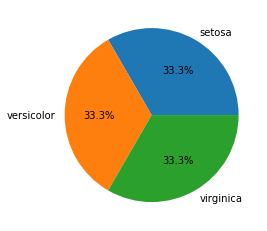

In [16]:
"""
ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
"""
# グラフ化に必要なライブラリーを準備する
import matplotlib as mpl
import matplotlib.pyplot as plt

# .plot.pie() で円グラフを表示可能
# https://pythondatascience.plavox.info/matplotlib/%E5%86%86%E3%82%B0%E3%83%A9%E3%83%95
# https://qiita.com/hik0107/items/de5785f680096df93efa
# df.plot.pie(subplots=True, autopct="%1.1f%%")

# グラフを出すだけなら.plot()で出力可能。デフォルトは折れ線グラフ
# df.plot( kind='pie', y= 'Species')

# plt.pie(df['Species'])

# 特徴量について調査して件数を確認した
df0 = df[df['Species'].isin([0])]
df0c = df0.count()
print(df0c)
df1 = df[df['Species'].isin([1])]
df1c = df1.count()
print(df1c)
df2 = df[df['Species'].isin([2])]
df2c = df2.count()
print(df2c)

# x = ['setosa', 'versicolor', 'virginica']　# ラベルの名前を直接入れる
x = list(iris.target_names) # 問１の内容を真似た
y = np.array([50,  50, 50]) # 50件ずつ存在しているので強引に入れた

# 下記は良くわからないけど、消すと年グラフが表示されなくなるので残す。
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(y, labels=x, autopct="%1.1f%%")

plt.show()

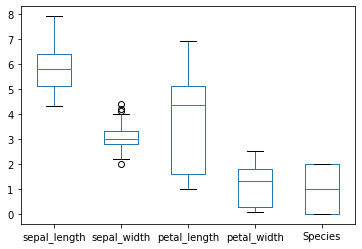

In [17]:
"""
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
"""
df.plot( kind='box')
# df.sepal_length.plot.box() # 一つの列を指定する方法

In [52]:
"""
ラベル（setosa, versicolor , virginica）毎にデータを分割。
分割したデータから特徴量毎に更に分割、sepal_length sepal_width petal_length petal_width

特徴量はsepal_lengthを選択
"""
df0 = df[df['Species'].isin([0])]
df03 = df0.iloc[:,3]
df03


0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
5     0.4
6     0.3
7     0.2
8     0.2
9     0.1
10    0.2
11    0.2
12    0.1
13    0.1
14    0.2
15    0.4
16    0.4
17    0.3
18    0.3
19    0.3
20    0.2
21    0.4
22    0.2
23    0.5
24    0.2
25    0.2
26    0.4
27    0.2
28    0.2
29    0.2
30    0.2
31    0.4
32    0.1
33    0.2
34    0.2
35    0.2
36    0.2
37    0.1
38    0.2
39    0.2
40    0.3
41    0.3
42    0.2
43    0.6
44    0.4
45    0.3
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal_width, dtype: float64

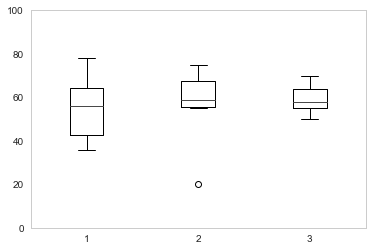

In [55]:
"""
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
"""
#データ作成
df1 = [36,62,78,50,65,40]
df2 = [20,55,58,70,75,60]
df3 = [50,55,61,70,65,55]
data = (df1,df2,df3)
# data = (df0)

fig = plt.figure()
ax = fig.add_subplot(111)

# 箱ひげ図をつくる
bp = ax.boxplot(data)

plt.grid()
plt.ylim([0,100])
plt.show()

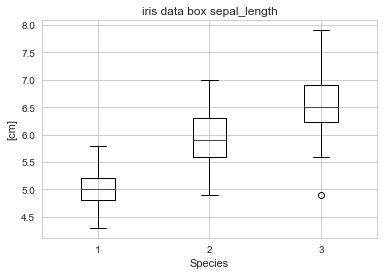

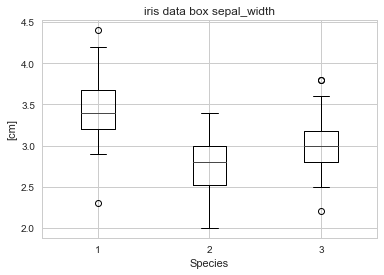

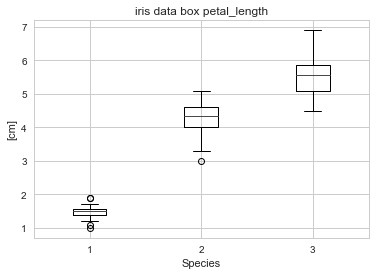

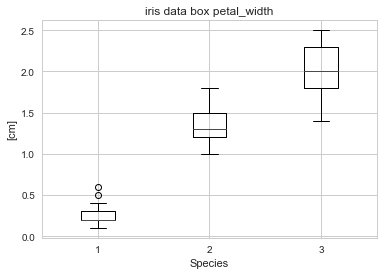

In [62]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
# 特徴量の名前をセット
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for feature in features: # 特徴量分ループ
    plt.boxplot([df[df["Species"]==0][feature], # ラベル毎にデータを分割して箱ひげに入れる
                 df[df["Species"]==1][feature],
                 df[df["Species"]==2][feature]])
#     plt.xticks([1, 2, 3])
    plt.xticks([1, 2, 3], iris.target_names) # 横軸にラベル毎に名前を入れる
    plt.title("iris data box {}".format(feature)) # 表のタイトル
    plt.ylabel('[cm]') # 軸のタイトル
    plt.xlabel('Species') # 軸のタイトル
    plt.show()

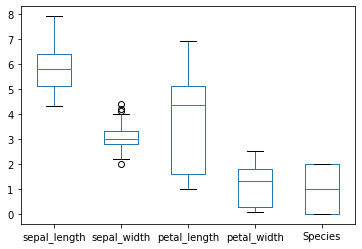

In [19]:
"""
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
"""
df.plot( kind='box')
# df.sepal_length.plot.box() # 一つの列を指定する方法

       variable  value
0  sepal_length    5.1
1  sepal_length    4.9
2  sepal_length    4.7
3  sepal_length    4.6
4  sepal_length    5.0


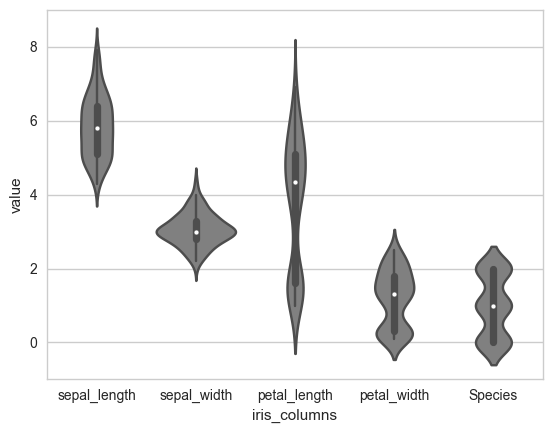

In [20]:
"""
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
"""

# 必要なライブラリーを取り込む
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# グラフの見た目を良くする
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')

# データフレームを投入する時は.meltが使いやすいらしい
df_melt = pd.melt(df)
print(df_melt.head())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.violinplot(x='variable', y='value', data=df_melt, jitter=True, color='gray', ax=ax)

ax.set_xlabel('iris_columns')
ax.set_ylabel('value')
ax.set_ylim(-1, 9)
plt.show()


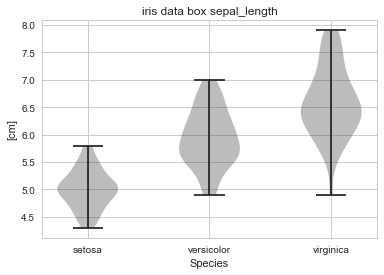

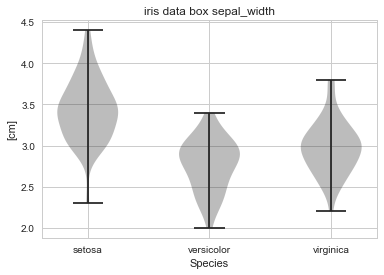

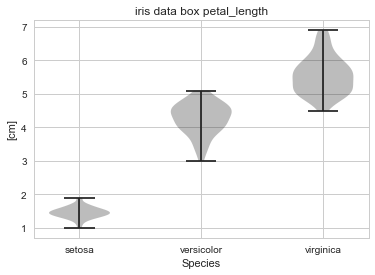

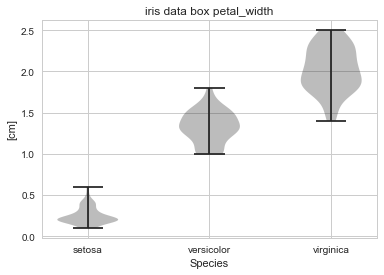

In [68]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

for feature in features: # 特徴量分ループ
    plt.violinplot([df[df["Species"]==0][feature], # ラベル毎にデータを分割して箱ひげに入れる
                 df[df["Species"]==1][feature],
                 df[df["Species"]==2][feature]])
#     plt.xticks([1, 2, 3]) # 名前を入れないと数値だけになる
    plt.xticks([1, 2, 3], iris.target_names) # 横軸にラベル毎に名前を入れる
    plt.title("iris data box {}".format(feature)) # 表のタイトル
    plt.ylabel('[cm]') # 軸のタイトル
    plt.xlabel('Species') # 軸のタイトル
    plt.show()

In [21]:
"""
箱ひげ図とバイオリン図は似た図を表示します。
これらはどう違い、それぞれどのような利点があるのかについて説明してください。

箱ひげ図はデータの存在範囲が分かりやすく、最大値や最小値が分かる。ただ、バラツキが読み取れない。
バイオリン図は反対にバラツキが視覚的に分かりやすいという特徴がある。
"""

'\n箱ひげ図とバイオリン図は似た図を表示します。\nこれらはどう違い、それぞれどのような利点があるのかについて説明してください。\n\n箱ひげ図はデータの存在範囲が分かりやすく、最大値や最小値が分かる。ただ、バラツキが読み取れない。\nバイオリン図は反対にバラツキが視覚的に分かりやすいという特徴がある。\n'

## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。
相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。
pandas.DataFrame.corr — pandas 0.24.2 documentation

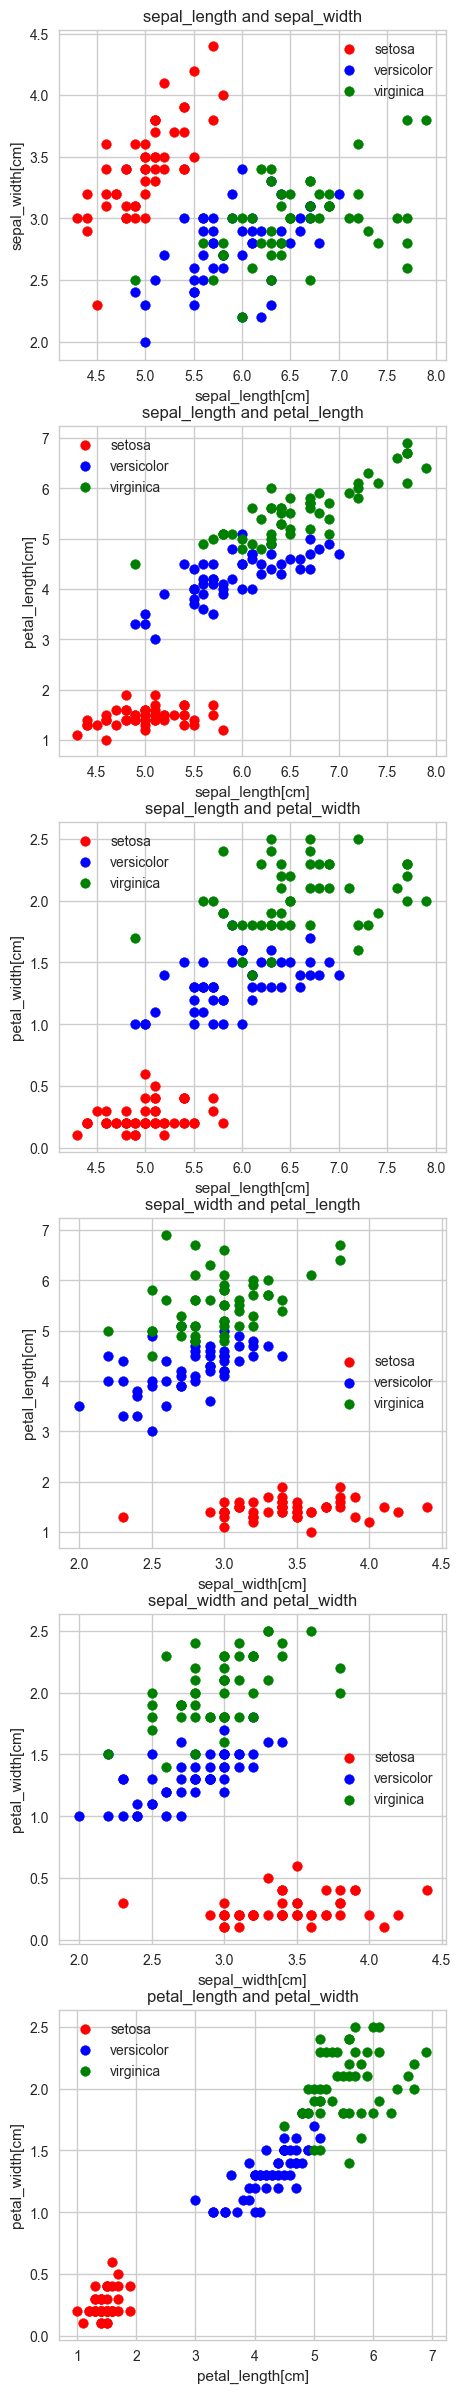

In [22]:
"""
縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
"""
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

import itertools
combinations = list(itertools.combinations(df.columns[:4], 2)) # 組み合わせの取得
fig, axes = plt.subplots(6, figsize=(5,30)) # subplotsを使うと複数のグラフをまとめられる
for i, comb in enumerate(combinations):
    axes[i].set_title(comb[0]+' and '+comb[1])
    axes[i].set(xlabel=comb[0]+'[cm]', ylabel=comb[1]+'[cm]')
    axes[i].scatter(df[df['Species']==0][comb[0]], df[df['Species']==0][comb[1]], c = 'red', label=load_iris().target_names[0])
    axes[i].scatter(df[df['Species']==1][comb[0]], df[df['Species']==1][comb[1]], c = 'blue', label=load_iris().target_names[1])
    axes[i].scatter(df[df['Species']==2][comb[0]], df[df['Species']==2][comb[1]], c = 'green', label=load_iris().target_names[2])
    axes[i].legend()
plt.show()

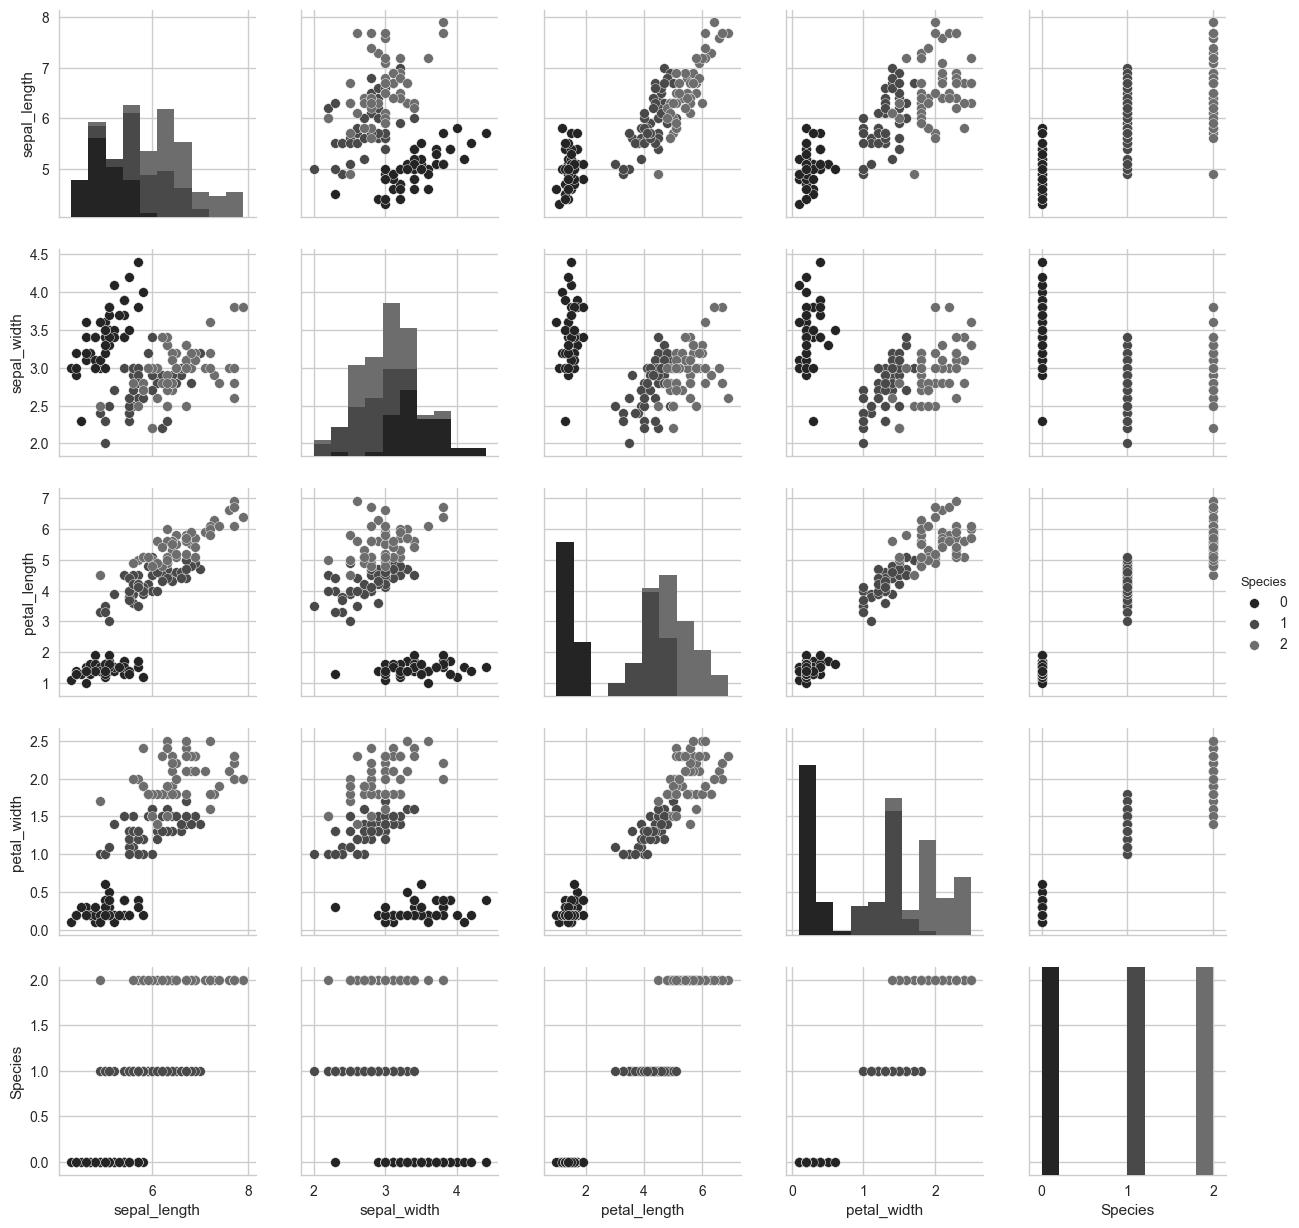

In [23]:
"""
全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
"""
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

import seaborn as sns

sns.pairplot(df, hue='Species')

In [24]:
"""
４つの特徴量に関する相関係数行列を作る
"""

df.iloc[:, 0:4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


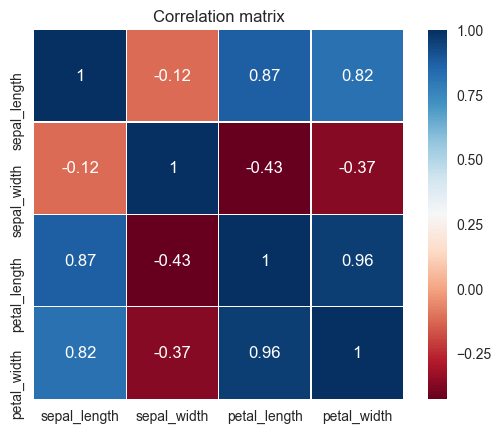

In [25]:
"""
相関係数行列のヒートマップを作る
"""

colormap = plt.cm.RdBu
plt.title('Correlation matrix')
sns.heatmap(df.iloc[:, 0:4].corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

## 【問題8】簡単な考察
データを探索した時には、考察をすることが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

In [26]:
"""
基本的に散布図を見ると３種類の違いが見易いイメージがある。
setosaはsepal_widthが長く、他は短い事がわかった。
versicolorは全ての特徴量が中庸であった。
viaginicaとversicolorは殆ど同じなので散布図からは判別が難しそう。
"""

'\n基本的に散布図を見ると３種類の違いが見易いイメージがある。\nsetosaはsepal_widthが長く、他は短い事がわかった。\nversicolorは全ての特徴量が中庸であった。\nviaginicaとversicolorは殆ど同じなので散布図からは判別が難しそう。\n'